## Part 1 - Data Cleaning
The first part is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

In [291]:
df_origin = pd.read_json("scout_car.json", lines=True)

In [292]:
df = df_origin.copy()
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [293]:
df.shape

(15919, 54)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [295]:
df.astype("str").duplicated().value_counts()

False    15919
dtype: int64

In [296]:
df.isnull().all(axis=1).value_counts()

False    15919
dtype: int64

In [297]:
df.isnull().any(axis=1).value_counts()

True    15919
dtype: int64

##### 0-url column

In [298]:
df["url"].value_counts()

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [299]:
df["url"].nunique()

15919

In [300]:
df["url"].dtypes

dtype('O')

In [301]:
df["url"].isnull().sum()

0

##### 1- make_model column

In [302]:
df["make_model"].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [303]:
df["make_model"].dtypes

dtype('O')

In [304]:
df[df["make_model"] == "Audi A2"]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
2614,https://www.autoscout24.com//offers/audi-a2-30...,Audi A2,"30 TDI Navi, Lane assist, Sitzheizung, Einpark...",Off-Road,28200,VAT deductible,"26,166 km",10/2018,1 previous owner,NaN,85 kW,"[, Employee's car, , Diesel (Particulate Filter)]",\n1\n,"[\n10/2019\n, \nEuro 6\n]",NaN,"[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A2, \n]",[\n27609\n],"[\n, 2018, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nG3 Nanograu Metallic\n],"[\nCloth, Black\n]","[\n, Off-Road, \n]",[\n5\n],[\n5\n],[\n0588/BJV\n],"[\n, Manual, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[4.9 l/100 km (comb)], [5.6 l/100 km (city)],...",NaN,[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...",[Alloy wheels],"[ABS, Adaptive Cruise Control, Central door lo...","[\n, Technik & Sicherheit:, 7-Gang-Automatikge...",[\n4 (Green)\n],NaN,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN


##### 19- Make column

In [305]:
df["Make"].value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [306]:
df["Make"].dtypes

dtype('O')

In [307]:
df["make_model"].str.split(" ", expand=True)[0]

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: 0, Length: 15919, dtype: object

In [308]:
df.rename(columns={"Make": "make"}, inplace=True)

In [309]:
df["make"] = df["make_model"].str.split(" ", expand=True)[0].astype("str")

In [310]:
df["make"].dtypes

dtype('O')

In [311]:
df["make"].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

##### 20- Model column

In [312]:
df.rename(columns={"Model": "model"}, inplace=True)

In [313]:
df["model"] = df["make_model"].str.split(" ", expand=True)[1].astype("str")

In [314]:
df["model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

##### 2- short_description

In [315]:
df["short_description"].value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [316]:
df[df["short_description"].isnull()]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,make,model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
372,https://www.autoscout24.com//offers/audi-a1-ga...,Audi A1,None,Compact,14700,None,"35,730 km",01/2016,None,NaN,92 kW,"[, Used, , Super 95]",NaN,NaN,\nYes\n,NaN,NaN,"[\n, \n, \n117 g CO2/km (comb)\n]",[],Audi,A1,NaN,"[\n, 2016, \n]","[\n, Red, \n]",[\nMetallic\n],[\nMisanorot Perleffekt\n],"[\nPart leather, Black\n]","[\n, Compact, \n]",[\n2\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,395 cc\n]",NaN,NaN,NaN,"[\n, Super 95, \n]","[[5.1 l/100 km (comb)], [6.3 l/100 km (city)],...",[\n117 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, O...","[Alloy wheels, Sport seats]","[ABS, Central door lock, Daytime running light...","[\n, Sonderausstattung:, Ablage-Paket, Airbag ...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,https://www.autoscout24.com//offers/audi-a1-di...,Audi A1,None,Sedans,13700,Price negotiable,"70,000 km",03/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel]",\n2\n,"[\n04/2019\n, \n4 (Green)\n]",NaN,NaN,NaN,"[\n, \n]",[],Audi,A1,NaN,"[\n, 2016, \n]","[\n, Violet, \n]",NaN,NaN,NaN,"[\n, Sedans, \n]",[\n5\n],[\n4\n],NaN,"[\n, Manual, \n]","[\n1,422 cc\n]",NaN,NaN,NaN,"[\n, Diesel, \n]",NaN,NaN,"[[], [], []]","[Armrest, Navigation system, Power windows, Se...","[Bluetooth, CD player, Digital radio, Hands-fr...",NaN,[Tire pressure monitoring system],[],[\n4 (Green)\n],NaN,NaN,NaN,[\n11/2018\n],NaN,NaN,NaN,NaN
2665,https://www.autoscout24.com//offers/audi-a3-cn...,Audi A3,None,Station wagon,18500,None,"105,000 km",06/2016,1 previous owner,NaN,81 kW,"[, Used, , CNG]",\n1\n,"[\n06/2019\n, \n4 (Green)\n]",NaN,NaN,"[\n, \n]",NaN,[],Audi,A3,NaN,"[\n, 2016, \n]","[\n, Grey, \n]",[\nMetallic\n],NaN,"[\nCloth, Black\n]","[\n, Station wagon, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,"[\n, CNG, \n]",NaN,NaN,"[[], [], []]","[Light sensor, Navigation system, Rain sensor]","[Bluetooth, CD player, On-board computer, Radio]",[Sport seats],"[ABS, Alarm system, Electronic stability contr...",[\ncontact mobile 00491716032863 tony\n],[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2790,https://www.autoscout24.com//offers/audi-a3-di...,Audi A3,None,Station wagon,17600,None,"37,985 km",01/2016,1 previous owner,NaN,81 kW,"[, Used, , Diesel]",\n1\n,NaN,NaN,[\n12 months\n],NaN,NaN,[],Audi,A3,[\n162999\n],"[\n, 2016, \n]","[\n, White, \n]",[\nMetallic\n],NaN,[\nCloth\n],"[\n, Station wagon, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,"[\n, Diesel, \n]",NaN,NaN,NaN,"[Air conditioning, Automatic climate control, ...",NaN,[Alloy wheels],"[ABS, Driver-side airbag, Passenger-side airba...","[\nTOTALMENTE GARANTIZADO, 1 SOLO PROPIETARIO ...",NaN,NaN,[\nSpain\n],NaN,NaN,NaN,NaN,NaN,NaN
2996,https://www.autoscout24.com//offers/audi-a3-di...,Audi A3,None,Station wagon,12990,VAT deductible,"179,000 km",03/2016,1 previous owner,NaN,110 kW,"[, Used, , Diesel]",\n1\n,NaN,"[\nYes\n, \n4 (Green)\n]",NaN,"[\n, \n]","[\n, \n]",[],Audi,A3,NaN,"[\n, 2016, \n]","[\n, Silver, \n]",[\nMetallic\n],NaN,"[\nCloth, Black\n]","[\n, Station wagon, \n]",[\n4\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,968 cc\n]",NaN,NaN,NaN,"[\n, Diesel, \n]",NaN,NaN,"[[], [], []]","[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Digital radio, On-board...",NaN,"[ABS, Adapti

##### 3- body_type column

In [317]:
df["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

##### 27- Body column

In [318]:
df["Body"]

0        [\n, Sedans, \n]
1        [\n, Sedans, \n]
2        [\n, Sedans, \n]
3        [\n, Sedans, \n]
4        [\n, Sedans, \n]
               ...       
15914       [\n, Van, \n]
15915       [\n, Van, \n]
15916       [\n, Van, \n]
15917       [\n, Van, \n]
15918       [\n, Van, \n]
Name: Body, Length: 15919, dtype: object

In [319]:
df["Body"].apply(lambda x: x[1] if type(x)==list else x)

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: Body, Length: 15919, dtype: object

In [320]:
df["Body"] = df["Body"].apply(lambda x: x[1] if type(x)==list else x)

In [321]:
df["Body"] = df["Body"].apply(lambda x: x[1] if type(x)==list else x)

In [322]:
df["Body"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

##### 4- price column

In [323]:
df["price"].dtypes

dtype('int64')

In [324]:
df["price"].min()

13

In [325]:
df["price"].max()

74600

In [326]:
df["price"].mean()

18019.896727181356

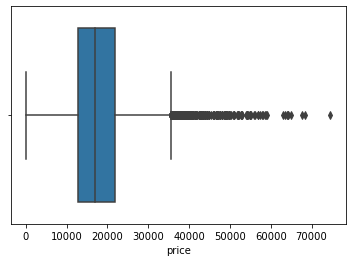

In [327]:
sns.boxplot(df["price"]);

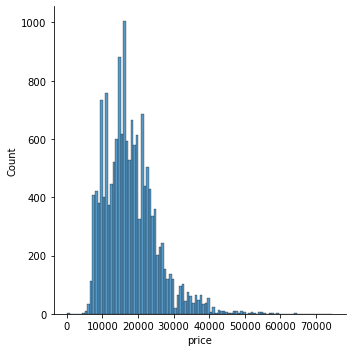

In [328]:
sns.displot(df["price"]);

##### 5- vat column

In [329]:
df["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

##### 6- km column

In [330]:
df["km"].dtypes

dtype('O')

In [331]:
df["km"].replace(["km", ","], "", regex=True, inplace=True)

In [332]:
df["km"].replace("- ",np.nan, inplace=True)

In [333]:
df["km"] = df["km"].astype("float")

In [334]:
df["km"].value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

In [335]:
df["km"].mean()

34130.127828130244

In [336]:
df["km"].min()

0.0

In [337]:
df["km"].max()

317000.0

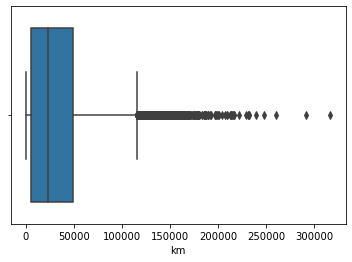

In [338]:
sns.boxplot(df["km"]);

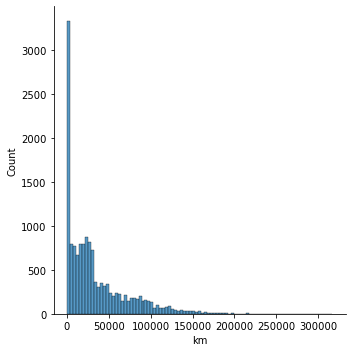

In [339]:
sns.displot(df["km"]);

##### 7- registration column

In [340]:
df["registration"]

0        01/2016
1        03/2017
2        02/2016
3        08/2016
4        05/2016
          ...   
15914        -/-
15915    01/2019
15916    03/2019
15917    06/2019
15918    01/2019
Name: registration, Length: 15919, dtype: object

In [341]:
df["registration"].dtypes

dtype('O')

In [342]:
df["registration"].sample(5)

1427    06/2017
944     02/2018
2617    10/2016
2860    02/2017
6391    01/2016
Name: registration, dtype: object

In [343]:
df["registration"].isnull().sum()

0

In [344]:
df["registration"].replace("-/-", np.nan, inplace=True)

In [345]:
df["registration"] = pd.to_datetime(df["registration"])

In [346]:
df["registration"].isnull().sum()

1597

In [347]:
df["registration"].value_counts(dropna=False)

NaT           1597
2018-03-01     695
2019-02-01     585
2018-05-01     572
2019-03-01     543
2019-01-01     541
2018-04-01     541
2018-02-01     539
2016-03-01     536
2016-04-01     532
2018-06-01     532
2018-01-01     511
2019-04-01     506
2016-02-01     472
2017-03-01     471
2016-05-01     459
2016-06-01     452
2019-05-01     440
2017-06-01     409
2017-05-01     404
2018-07-01     396
2017-04-01     380
2016-01-01     376
2017-02-01     368
2017-01-01     306
2018-08-01     285
2019-06-01     224
2017-07-01     215
2017-11-01     180
2016-07-01     176
2016-10-01     160
2017-10-01     154
2017-09-01     149
2016-11-01     142
2018-09-01     141
2016-09-01     141
2016-12-01     134
2017-12-01     123
2017-08-01     114
2018-11-01     110
2018-12-01     103
2018-10-01      97
2016-08-01      94
2019-07-01       6
2019-09-01       5
2019-08-01       1
2019-11-01       1
2019-12-01       1
Name: registration, dtype: int64

##### 22- First Registration column

In [348]:
df["First Registration"]

0        [\n, 2016, \n]
1        [\n, 2017, \n]
2        [\n, 2016, \n]
3        [\n, 2016, \n]
4        [\n, 2016, \n]
              ...      
15914               NaN
15915    [\n, 2019, \n]
15916    [\n, 2019, \n]
15917    [\n, 2019, \n]
15918    [\n, 2019, \n]
Name: First Registration, Length: 15919, dtype: object

In [349]:
df["First Registration"].isnull().sum()

1597

In [350]:
df["First Registration"].apply(lambda x : x[1] if type(x) == list else np.nan)

0        2016
1        2017
2        2016
3        2016
4        2016
         ... 
15914     NaN
15915    2019
15916    2019
15917    2019
15918    2019
Name: First Registration, Length: 15919, dtype: object

In [351]:
df["First Registration"] = df["First Registration"].apply(lambda x : x[1] if type(x) == list else np.nan).astype("float")

In [352]:
df["First Registration"].isnull().sum()

1597

In [353]:
df["First Registration"].value_counts(dropna=False)

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: First Registration, dtype: int64

In [354]:
df.rename(columns={"First Registration": "first_registration"}, inplace=True)

In [355]:
df["age"] = 2019 - df["first_registration"]

In [356]:
df["age"].value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

##### 8- prev_owner column

In [357]:
df["prev_owner"]

0        2 previous owners
1                     None
2         1 previous owner
3         1 previous owner
4         1 previous owner
               ...        
15914                 None
15915     1 previous owner
15916     1 previous owner
15917                 None
15918     1 previous owner
Name: prev_owner, Length: 15919, dtype: object

In [358]:
df["prev_owner"].isnull().sum()

6828

In [359]:
df["prev_owner"].unique()

array(['2 previous owners', None, '1 previous owner', '3 previous owners',
       '4 previous owners'], dtype=object)

In [360]:
df["prev_owner"] = df["prev_owner"].str.split(" ", expand=True)[0].astype("float")

In [361]:
df["prev_owner"].unique()

array([ 2., nan,  1.,  3.,  4.])

In [362]:
df["prev_owner"].dtypes

dtype('float64')

In [363]:
df["prev_owner"].value_counts(dropna=False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [364]:
df[df["prev_owner"].notnull() & df["Previous Owners"].isnull()]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,make,model,Offer Number,first_registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from,age


##### 12- Previous Owners column

In [365]:
df["Previous Owners"]

0                                                    \n2\n
1                                                      NaN
2                                                    \n1\n
3                                                    \n1\n
4                                                    \n1\n
                               ...                        
15914                                                  NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...
15916                     [\n1\n, \n139 g CO2/km (comb)\n]
15917                                                  NaN
15918                                                \n1\n
Name: Previous Owners, Length: 15919, dtype: object

In [366]:
df["Previous Owners"].isnull().sum()

6640

In [367]:
df["Previous Owners"] = df["Previous Owners"].apply(lambda x : x[0] if type(x) == list else x).str.split("\n", expand=True)[1]

In [368]:
df["Previous Owners"] = df["Previous Owners"].astype("float")

In [369]:
df["Previous Owners"].value_counts(dropna=False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: Previous Owners, dtype: int64

In [370]:
df.rename(columns={"Previos Owners":"previous_owners"}, inplace=True)

##### 9- kW column

In [371]:
df["kW"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15914   NaN
15915   NaN
15916   NaN
15917   NaN
15918   NaN
Name: kW, Length: 15919, dtype: float64

In [372]:
df["kW"].isnull().value_counts()

True    15919
Name: kW, dtype: int64

##### 10- hp column

In [373]:
df["hp"]

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object

In [374]:
df["hp"].value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [375]:
df["hp"].replace("- kW", np.nan, inplace=True)

In [376]:
df["hp"] = df["hp"].str.split(" ",expand=True)[0].astype("float")

In [377]:
df["hp"].value_counts(dropna=False)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
1.0        20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
80.0        3
168.0       3
98.0        3
93.0        3
228.0       2
270.0       2
53.0        2
140.0       2
86.0        2
167.0       2
127.0       2
89.0        2
143.0       2
63.0        2
40.0        2
150.0       2
163.0       1
115.0       1
132.0       1
75.0  

In [378]:
df.rename(columns={"hp":"hp_kw"}, inplace=True)

##### 11- Type

In [379]:
df["Type"]

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: Type, Length: 15919, dtype: object

In [380]:
df["Type"].apply(lambda x : x[1] if type(x) == list else x)

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [381]:
df["Type"] = df["Type"].apply(lambda x : x[1] if type(x) == list else x)

In [382]:
df["Type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

##### 13- Next Inspection column

In [383]:
df["Next Inspection"]

0         [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                          ...                  
15914                                       NaN
15915    [\n01/2022\n, \n168 g CO2/km (comb)\n]
15916                                       NaN
15917                                       NaN
15918                                       NaN
Name: Next Inspection, Length: 15919, dtype: object

In [384]:
df["Next Inspection"].isnull().value_counts()

True     12384
False     3535
Name: Next Inspection, dtype: int64

In [385]:
df["Next Inspection"].apply(lambda x : x[0] if type(x)== list else x).str.split("\n", expand=True)[1]

0        06/2021
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
15914        NaN
15915    01/2022
15916        NaN
15917        NaN
15918        NaN
Name: 1, Length: 15919, dtype: object

In [386]:
df["Next Inspection"] = df["Next Inspection"].apply(lambda x : x[0] if type(x)== list else x).str.split("\n", expand=True)[1]

In [387]:
df["Next Inspection"] = pd.to_datetime(df["Next Inspection"])

In [388]:
df.rename(columns={"Next Inspection" : "next_inspection"}, inplace=True)

In [389]:
df["next_inspection"]

0       2021-06-01
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
15914          NaT
15915   2022-01-01
15916          NaT
15917          NaT
15918          NaT
Name: next_inspection, Length: 15919, dtype: datetime64[ns]

In [390]:
df["next_inspection"].value_counts(dropna=False, normalize=True)

NaT           0.777938
2021-06-01    0.029587
2021-03-01    0.013192
2021-05-01    0.011307
2021-04-01    0.010742
2021-02-01    0.010553
2022-04-01    0.009046
2022-05-01    0.008983
2021-01-01    0.008292
2022-03-01    0.007601
2020-03-01    0.007098
2022-02-01    0.007036
2022-01-01    0.006722
2020-02-01    0.004649
2020-04-01    0.004272
2021-07-01    0.004272
2021-08-01    0.004020
2020-01-01    0.003958
2020-05-01    0.003895
2020-11-01    0.003643
2020-06-01    0.003643
2019-04-01    0.003141
2020-12-01    0.003141
2019-05-01    0.003141
2021-11-01    0.003078
2020-07-01    0.003015
2021-09-01    0.002890
2019-07-01    0.002701
2019-09-01    0.002576
2019-06-01    0.002513
2022-06-01    0.002513
2020-10-01    0.002387
2019-03-01    0.002261
2020-08-01    0.002199
2019-11-01    0.002199
2019-08-01    0.002010
2019-10-01    0.002010
2019-02-01    0.001947
2019-01-01    0.001759
2020-09-01    0.001696
2021-12-01    0.001382
2023-01-01    0.001256
2021-10-01    0.001256
2019-12-01 

##### 14- Inspection new column

In [391]:
df["Inspection new"]

0                     [\nYes\n, \nEuro 6\n]
1                                       NaN
2                                       NaN
3                                       NaN
4        [\nYes\n, \n109 g CO2/km (comb)\n]
                        ...                
15914                                   NaN
15915                                   NaN
15916           [\nYes\n, \nEuro 6d-TEMP\n]
15917                                   NaN
15918    [\nYes\n, \n153 g CO2/km (comb)\n]
Name: Inspection new, Length: 15919, dtype: object

In [392]:
df["Inspection new"].apply(lambda x : x[0] if type(x) == list else x).str.split("\n",expand=True)[1]

0        Yes
1        NaN
2        NaN
3        NaN
4        Yes
        ... 
15914    NaN
15915    NaN
15916    Yes
15917    NaN
15918    Yes
Name: 1, Length: 15919, dtype: object

In [393]:
df["Inspection new"] = df["Inspection new"].apply(lambda x : x[0] if type(x) == list else x).str.split("\n",expand=True)[1]

In [394]:
df["Inspection new"].unique()

array(['Yes', nan], dtype=object)

In [395]:
df.rename(columns={"Inspection new": "inspection_new"}, inplace=True)

In [396]:
df["inspection_new"].value_counts(dropna=False, normalize=True)

NaN    0.753
Yes    0.247
Name: inspection_new, dtype: float64

##### 15- Warranty column

In [397]:
df["Warranty"].astype("str").value_counts()

nan                                                                                                                5420
['\n', '\n', '\nEuro 6\n']                                                                                         1868
\n12 months\n                                                                                                      1177
\n                                                                                                                  979
\n24 months\n                                                                                                       566
                                                                                                                   ... 
['\n72 months\n', '\n125 g CO2/km (comb)\n']                                                                          1
['\n60 months\n', '\n14 g CO2/km (comb)\n']                                                                           1
['\n24 months\n', '\n121 g CO2/km (comb)

In [398]:
df["Warranty"].apply(lambda x: x[0] if type(x)==list else x)

0                   \n
1                  NaN
2                   \n
3                  NaN
4                   \n
             ...      
15914    \n24 months\n
15915               \n
15916               \n
15917               \n
15918              NaN
Name: Warranty, Length: 15919, dtype: object

In [399]:
df["Warranty"] = df["Warranty"].apply(lambda x: x[0] if type(x)==list else x)

In [400]:
df["Warranty"].str.strip("\n").str.extract("(\d+)")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15914,24
15915,NaN
15916,NaN
15917,NaN


In [401]:
df["Warranty"] = df["Warranty"].str.strip("\n").str.extract("(\d+)").astype("float")

In [402]:
df["Warranty"].value_counts(dropna=False, normalize=True)

NaN     0.695144
12.0    0.162950
24.0    0.070231
60.0    0.025190
36.0    0.017526
48.0    0.009360
6.0     0.007852
72.0    0.003706
3.0     0.002073
23.0    0.000691
18.0    0.000628
20.0    0.000440
25.0    0.000377
2.0     0.000314
50.0    0.000251
26.0    0.000251
16.0    0.000251
4.0     0.000188
1.0     0.000188
19.0    0.000188
34.0    0.000188
13.0    0.000188
28.0    0.000126
22.0    0.000126
14.0    0.000126
11.0    0.000126
46.0    0.000126
21.0    0.000126
9.0     0.000126
17.0    0.000126
45.0    0.000126
33.0    0.000063
40.0    0.000063
65.0    0.000063
10.0    0.000063
15.0    0.000063
7.0     0.000063
8.0     0.000063
56.0    0.000063
49.0    0.000063
47.0    0.000063
30.0    0.000063
Name: Warranty, dtype: float64

##### 16- Full Service column

In [403]:
df["Full Service"].sample(10)

10706                 [\n, \n, \nEuro 6\n]
12616                             [\n, \n]
9582                  [\n, \n, \nEuro 6\n]
12794           [\n, \n, \nEuro 6d-TEMP\n]
10349                                  NaN
5268                                   NaN
9278                                   NaN
486                               [\n, \n]
14584    [\n, \n, \n114 g CO2/km (comb)\n]
12263           [\n, \n, \nEuro 6d-TEMP\n]
Name: Full Service, dtype: object

In [404]:
df["Full Service"].astype("str").value_counts(normalize=True)

nan                                                                                                             0.483950
['\n', '\n', '\n4 (Green)\n']                                                                                   0.140398
['\n', '\n', '\nEuro 6\n']                                                                                      0.131729
['\n', '\n']                                                                                                    0.106916
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                0.025064
                                                                                                                  ...   
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                          0.000063
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                          0.000063
['\n', '\n', '\n', '6 l/100 km (

##### 17- Non-smoking Vehicle column

In [405]:
df["Non-smoking Vehicle"]

0                       [\n, \n]
1                            NaN
2                            NaN
3           [\n, \n, \nEuro 6\n]
4                       [\n, \n]
                  ...           
15914                        NaN
15915    [\n, \n, \n4 (Green)\n]
15916                   [\n, \n]
15917                        NaN
15918                        NaN
Name: Non-smoking Vehicle, Length: 15919, dtype: object

In [406]:
df["Non-smoking Vehicle"].sample(10)

15594                [\n, \n]
4478                 [\n, \n]
14978                     NaN
11650                [\n, \n]
2726                      NaN
155      [\n, \n, \nEuro 6\n]
12174                [\n, \n]
1803                      NaN
7021                      NaN
12925                     NaN
Name: Non-smoking Vehicle, dtype: object

In [407]:
df["Non-smoking Vehicle"].astype("str").value_counts(dropna=False, normalize=True)

nan                                                                                                             0.549155
['\n', '\n']                                                                                                    0.229097
['\n', '\n', '\n4 (Green)\n']                                                                                   0.077894
['\n', '\n', '\nEuro 6\n']                                                                                      0.070796
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                0.021672
\n                                                                                                              0.004397
['\n', '\n', '\n120 g CO2/km (comb)\n']                                                                         0.003958
['\n', '\n', '\n85 g CO2/km (comb)\n']                                                                          0.002890
['\n', '\n', '\n104 g CO2/km (co

##### 18- null column

In [408]:
df["null"]

0        []
1        []
2        []
3        []
4        []
         ..
15914    []
15915    []
15916    []
15917    []
15918    []
Name: null, Length: 15919, dtype: object

##### 21- Offer Number column

In [409]:
df["Offer Number"].sample(10)

1180            [\n5005773\n]
10186       [\n00-11-11198\n]
13757          [\n11488789\n]
8738                  [\n4\n]
11274           [\n4920KCT\n]
7430     [\nman-A4J8032309\n]
4390                      NaN
9986               [\n5679\n]
15678          [\nVN027908\n]
8402                      NaN
Name: Offer Number, dtype: object

In [410]:
df["Offer Number"].apply(lambda x : x[0] if type(x) == list else x).str.split("\n",expand=True)[1]

0             LR-062483
1                   NaN
2              AM-95365
3                   NaN
4                 C1626
              ...      
15914          10988301
15915       507370_3223
15916          Espace16
15917           2691331
15918    Re_30000008029
Name: 1, Length: 15919, dtype: object

In [411]:
df["Offer Number"] = df["Offer Number"].apply(lambda x : x[0] if type(x) == list else x).str.split("\n",expand=True)[1]

In [412]:
df["Offer Number"].value_counts(dropna=False, normalize=True)

NaN                                         0.199447
LT67679                                     0.001696
UN89904                                     0.001696
XJ38068                                     0.001696
JV03654                                     0.001696
                                              ...   
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b    0.000063
6701576                                     0.000063
6701569                                     0.000063
158121                                      0.000063
Re_30000008029                              0.000063
Name: Offer Number, Length: 11441, dtype: float64

##### 23- Body Color column

In [413]:
df["Body Color"].apply(lambda x : x[1] if type(x) == list else x)

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body Color, Length: 15919, dtype: object

In [414]:
df["Body Color"] = df["Body Color"].apply(lambda x : x[1] if type(x) == list else x)

In [415]:
df["Body Color"].unique()

array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Silver', 'Blue', nan,
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange', 'Gold'],
      dtype=object)

In [416]:
df["Body Color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

##### 25- Body Color Original column

In [417]:
df["Body Color Original"].apply(lambda x : x[0] if type(x)== list else x).str.split("\n",expand=True)[1]

0                 Mythosschwarz
1                           NaN
2        mythosschwarz metallic
3                           NaN
4        Mythosschwarz Metallic
                  ...          
15914              Grigio scuro
15915       Stahl-Grau Metallic
15916               arktis-weiß
15917                    Grigio
15918    Titanium-Grau Metallic
Name: 1, Length: 15919, dtype: object

In [418]:
df["Body Color Original"] = df["Body Color Original"].apply(lambda x : x[0] if type(x)== list else x).str.split("\n",expand=True)[1]

In [419]:
df["Body Color Original"].value_counts(dropna=False, normalize=True)

NaN                              0.236133
Onyx Schwarz                     0.021232
Bianco                           0.017715
Mythosschwarz Metallic           0.014951
Brillantschwarz                  0.013569
                                   ...   
Rouge-Braun (G0Y)                0.000063
VARI COLRI DISPONIBILI           0.000063
Kokosnussbraun Metallic          0.000063
Farbe frei wählbar               0.000063
Perlmutt-Weiß Metallic (Weiß)    0.000063
Name: Body Color Original, Length: 1928, dtype: float64

##### 24- Paint Type column

In [420]:
df["Paint Type"].apply(lambda x : x[0] if type(x)==list else x).str.split("\n", expand=True)[1]

0        Metallic
1             NaN
2        Metallic
3        Metallic
4        Metallic
           ...   
15914    Metallic
15915    Metallic
15916         NaN
15917         NaN
15918    Metallic
Name: 1, Length: 15919, dtype: object

In [421]:
df["Paint Type"]=df["Paint Type"].apply(lambda x : x[0] if type(x)==list else x).str.split("\n", expand=True)[1]

In [422]:
df["Paint Type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

##### 26- Upholstery column

In [423]:
df["Upholstery"].sample(10)

10798                          NaN
10604                          NaN
7791     [\nPart leather, Black\n]
1642                           NaN
8863            [\nCloth, Black\n]
9071            [\nCloth, Black\n]
1931            [\nCloth, Black\n]
12969                          NaN
6139                   [\nCloth\n]
14971    [\nPart leather, Brown\n]
Name: Upholstery, dtype: object

In [424]:
df["Upholstery"].astype("str").value_counts(dropna=False)

['\nCloth, Black\n']           5821
nan                            3720
['\nPart leather, Black\n']    1121
['\nCloth\n']                  1005
['\nCloth, Grey\n']             891
['\nCloth, Other\n']            639
['\nFull leather, Black\n']     575
['\nBlack\n']                   491
['\nGrey\n']                    273
['\nOther, Other\n']            182
['\nPart leather\n']            140
['\nFull leather\n']            139
['\nFull leather, Brown\n']     116
['\nPart leather, Grey\n']      116
['\nOther, Black\n']            110
['\nFull leather, Other\n']      72
['\nFull leather, Grey\n']       67
['\nPart leather, Other\n']      65
['\nOther\n']                    56
['\nPart leather, Brown\n']      50
['\nalcantara, Black\n']         47
['\nVelour, Black\n']            36
['\nFull leather, Beige\n']      36
['\nCloth, Brown\n']             28
['\nVelour\n']                   16
['\nOther, Grey\n']              15
['\nCloth, Beige\n']             13
['\nBrown\n']               

In [425]:
color = ["Beige", "Red", "Black", "Green", "Grey", "Yellow", "Brown", "Orange", "Blue","White"]
style = ["alcantara", "Full leather", "Velour", "Cloth", "Part leather", "Other"]

In [426]:
df["Upholstery"] = df["Upholstery"].apply(lambda x: x[0] if type(x)==list else x).str.strip("\n").str.split(",")

In [427]:
df["upholstery_style"] = df["Upholstery"].apply(lambda x: x[0] if type(x) == list and x[0] in style else np.nan)

In [428]:
for i in df["Upholstery"]:
    if type(i) == list and len(i) ==2:
        print(i[1])
    elif type(i) == list and len(i) ==1 and i[0] in color:
        print(i[0])
    

 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Grey
 Black
 Grey
 Other
 Black
 Black
 Black
 White
 Black
 Grey
Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Red
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
Black
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Grey
 Black
 Black
 Grey
 Black
 Grey
 Grey
 Black
 Black
 Grey
 Grey
 Black
 Blue
 Other
 Black
 Black
 Grey
 Black
 Black
 Black
 Red
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
Grey
 Red
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
Blue
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Gre

 Grey
 Black
 Other
 Other
 Black
 Other
 Other
 Grey
 Black
 Grey
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Other
 Grey
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Grey
 Other
 Black
 Black
 Black
 Other
 Black
 Black
 Other
 Black
 Black
 Grey
 Black
 Grey
 Grey
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Other
 Black
 Grey
 Other
 Other
 Other
 Black
 Black
 Black
 Other
 Black
 Other
 Black
 Black
 Other
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Other
 Black
 Grey
 Black
 Black
 Grey
 Grey
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Grey
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Blac

 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Other
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Other
 Black
 Other
 Black
Black
 Black
 Black
 Black
 Other
 Black
 Black
 Other
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Other
 Black
 Other
 Black
 Other
 Other
 Other
 Other
 Other
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Other
 Black
 Other
 Other
 Black
 Other
 Other
 Other
 Grey
 Black
 Other
 Grey
 Other
 Other
 Other
 Other
 Grey
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Grey
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Other
 Black
 Grey
 Grey
 Black
 Grey
 Grey
 Other
 Black
 Other
 Black
 Other
 Other
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Grey
 Other
 Other
 Other
Blue
 Grey
 Black
 Grey
 Grey
 Black
 Black
 Other
 Other
 Black
 Black
 Other
 Black
 Black
 Black
 Bla

 Black
 Other
 Grey
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Grey
 Black
 Grey
 Black
 Black
 Grey
 Black
 Black
 Grey
 Grey
 Black
 Black
 Black
 Grey
 Grey
 Grey
 Other
 Black
 Black
 Grey
 Black
 Grey
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Grey
 Black
Black
 Other
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
Grey
Grey
Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
Grey
Grey
Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Grey
 Black
 Black
 Other
 Black
 Black
 Grey
 Grey
 Black
Black
 Grey
 Other
 Grey
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
Black
 Grey
 Black
 Black
 Grey
 Grey
 Grey
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 B

 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Other
 Other
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Other
 Other
 Grey
Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Grey
 Grey
 Grey
 Grey
 Grey
 Black
 Grey
 Black
 Black
 Black
 Black
Black
 Beige
 Grey
 Black
 Grey
 Black
 Black
 Black
Black
 Black
Grey
 Black
 Black
Grey
Grey
Grey
 Grey
 Black
 Grey
 Black
 Grey
 Black
 Grey
 Grey
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Beige
 Black
 Black
 Black
 Beige
 Black
 Black
 Other
 Black
 Black
 Black
Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Brown
 Black
 Black
 Grey
 Black
 Brown
 Other
 Other
 Black
 Black
 Black
 Black
 Black
 Grey
Black
 Black
 Black
 Black
 Black
 Black
 Beige
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Bla

 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Other
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Other
 Other
 Other
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Grey
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Other
 Other
 Black
Black
 Black
 Black
 Other
 Other
 Black
 Black
 Black
 Other
 Other
 Other
 Other
 Black
 Black
 Black
 Other
 Other
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Black
 Black
 Black
 Black
 Other
 Black
 Other
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Black
 Other
 Other
 Black
 Other
 Black
 Other
 Other
 Other
 Other
 Other
 Other
 Other
 Other
 Other
 Black
 Other
 Other
 Black
 Other
 Other
 Other
 Other
 Black
 Other
 Other
 Other
 Other
 Other
 Black
 Black
 Black
 Black
 Black
 Brown
 Black
 Black
 

 Black
Grey
 Blue
 Brown
Black
Black
Black
Black
Black
Black
Black
Black
Black
Black
Black
Grey
 Other
 Brown
Grey
 Other
 Other
 Other
 Brown
 Grey
 Other
 Black
 Brown
 Brown
 Black
 Grey
 Brown
 Grey
 Brown
 Grey
 Black
 Grey
 Brown
 Brown
 Black
Brown
 Other
 Black
Grey
Grey
Grey
 Grey
 Brown
 Brown
 Black
 Black
 Brown
 Other
 Black
 Black
 Brown
 Black
 Grey
 Black
 Brown
 Black
 Brown
 Black
 Grey
 Brown
 Black
 Black
 Brown
 Brown
 Brown
 Black
 Black
 Brown
 Grey
 Brown
 Black
 Brown
 Black
 Grey
 Black
 Grey
 Brown
 Black
 Black
 Black
 Black
 Other
 Other
 Beige
 White
Black
 Black
 Brown
 Brown
 Brown
 Brown
 Black
 Brown
 Brown
 Black
 Grey
 Brown
 Beige
 Brown
 Black
 Black
 Other
 Black
 Black
 Brown
 Black
 Black
 Black
Black
 Other
 Other
 Brown
 Other
 Brown
 Brown
 Black
 Brown
 Black
Brown
Brown
 Grey
 Other
 Black
 Black
 Black
 White
 Brown
 Brown
 Grey
Brown
 Black
 Brown
 Beige
 Other
 Black
 Grey
 Other
 Grey
 Black
 Grey
 Brown
 Black
 Black
 Brown
 Grey
 Blac

In [429]:
def func(x):
    if type(x)==list and len(x)==2:
        return x[1].strip()
    elif type(x) ==list and len(x)==1 and x[0] in color:
            return x[0].strip()
    else:
        return np.nan

In [430]:
df["Upholstery"].apply(func).value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery, dtype: int64

In [431]:
df["upholstery_color"] = df["Upholstery"].apply(func)

##### 28- Nr. of Doors column

In [432]:
df["Nr. of Doors"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "").astype("float")

0        5.0
1        3.0
2        4.0
3        3.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    5.0
15917    5.0
15918    5.0
Name: Nr. of Doors, Length: 15919, dtype: float64

In [433]:
df["Nr. of Doors"] = df["Nr. of Doors"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "").astype("float")

In [434]:
df.rename(columns={"Nr. of Doors": "doors"}, inplace=True)

In [435]:
df["doors"].value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: doors, dtype: int64

##### 29- Nr. of Seats column

In [436]:
df["Nr. of Seats"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "").astype("float")

0        5.0
1        4.0
2        4.0
3        4.0
4        5.0
        ... 
15914    5.0
15915    5.0
15916    7.0
15917    7.0
15918    5.0
Name: Nr. of Seats, Length: 15919, dtype: float64

In [437]:
df["Nr. of Seats"] = df["Nr. of Seats"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "").astype("float")

In [438]:
df.rename(columns={"Nr. of Seats": "seats"}, inplace=True)

In [439]:
df["seats"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: seats, dtype: int64

##### 30- Model Code column

In [440]:
df["Model Code"]

0        [\n0588/BDF\n]
1        [\n0588/BCY\n]
2                   NaN
3                   NaN
4        [\n0588/BDF\n]
              ...      
15914               NaN
15915    [\n0000/000\n]
15916               NaN
15917               NaN
15918    [\n3333/BHJ\n]
Name: Model Code, Length: 15919, dtype: object

In [441]:
df["Model Code"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "")

0        0588/BDF
1        0588/BCY
2             NaN
3             NaN
4        0588/BDF
           ...   
15914         NaN
15915    0000/000
15916         NaN
15917         NaN
15918    3333/BHJ
Name: Model Code, Length: 15919, dtype: object

In [442]:
df["Model Code"] = df["Model Code"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "")

In [443]:
df.rename(columns={"Model Code": "model_code"}, inplace=True)

In [444]:
df["model_code"].value_counts(dropna=False, normalize=True)

NaN         0.687292
0035/BCB    0.016835
0588/BNO    0.015390
0588/BDB    0.012941
0588/BHX    0.011810
              ...   
0035/AVN    0.000063
0035/BEM    0.000063
0035/BAG    0.000063
0035/BAA    0.000063
3333/BKG    0.000063
Name: model_code, Length: 233, dtype: float64

##### 31- Gearing Type column

In [445]:
df["Gearing Type"]

0        [\n, Automatic, \n]
1        [\n, Automatic, \n]
2        [\n, Automatic, \n]
3        [\n, Automatic, \n]
4        [\n, Automatic, \n]
                ...         
15914    [\n, Automatic, \n]
15915    [\n, Automatic, \n]
15916    [\n, Automatic, \n]
15917    [\n, Automatic, \n]
15918    [\n, Automatic, \n]
Name: Gearing Type, Length: 15919, dtype: object

In [446]:
df["Gearing Type"].apply(lambda x : x[1] if type(x) == list else x)

0        Automatic
1        Automatic
2        Automatic
3        Automatic
4        Automatic
           ...    
15914    Automatic
15915    Automatic
15916    Automatic
15917    Automatic
15918    Automatic
Name: Gearing Type, Length: 15919, dtype: object

In [447]:
df["Gearing Type"] = df["Gearing Type"].apply(lambda x : x[1] if type(x) == list else x)

In [448]:
df.rename(columns={"Gearing Type": "gearing_type"}, inplace=True)

In [449]:
df["gearing_type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

##### 32- Displacement column

In [450]:
df["Displacement"]

0        [\n1,422 cc\n]
1        [\n1,798 cc\n]
2        [\n1,598 cc\n]
3        [\n1,422 cc\n]
4        [\n1,422 cc\n]
              ...      
15914    [\n1,997 cc\n]
15915    [\n1,798 cc\n]
15916    [\n1,997 cc\n]
15917    [\n1,997 cc\n]
15918    [\n1,798 cc\n]
Name: Displacement, Length: 15919, dtype: object

In [451]:
df["Displacement"].apply(lambda x : x[0] if type(x) == list else x).replace(["\n", ","," ", "cc"], "", regex=True).astype("float")

0        1422.0
1        1798.0
2        1598.0
3        1422.0
4        1422.0
          ...  
15914    1997.0
15915    1798.0
15916    1997.0
15917    1997.0
15918    1798.0
Name: Displacement, Length: 15919, dtype: float64

In [452]:
df["Displacement"] = df["Displacement"]\
.apply(lambda x : x[0] if type(x) == list else x).replace(["\n", ","," ", "cc"], "", regex=True).astype("float")

In [453]:
df.rename(columns={"Displacement": "cc_displacement"}, inplace=True)

In [454]:
df["cc_displacement"].value_counts(dropna=False)

1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0          1
1533.0        1
1100.0        1
1350.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0  

In [455]:
df["cc_displacement"].isnull().value_counts()

False    15423
True       496
Name: cc_displacement, dtype: int64

##### 33- Cylinders column

In [456]:
df["Cylinders"]

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object

In [457]:
df["Cylinders"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "").astype("float")

0        3.0
1        4.0
2        NaN
3        3.0
4        3.0
        ... 
15914    4.0
15915    4.0
15916    4.0
15917    4.0
15918    4.0
Name: Cylinders, Length: 15919, dtype: float64

In [458]:
df["Cylinders"] = df["Cylinders"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "").astype("float")

In [459]:
df["Cylinders"].value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
8.0       2
2.0       2
1.0       1
Name: Cylinders, dtype: int64

##### 34-Weight column

In [460]:
df["Weight"]

0        [\n1,220 kg\n]
1        [\n1,255 kg\n]
2                   NaN
3        [\n1,195 kg\n]
4                   NaN
              ...      
15914    [\n1,758 kg\n]
15915    [\n1,708 kg\n]
15916               NaN
15917    [\n1,758 kg\n]
15918    [\n1,685 kg\n]
Name: Weight, Length: 15919, dtype: object

In [461]:
df["Weight"].apply(lambda x: x[0] if type(x) == list else x ).replace(["\n", ",", " kg"], "", regex=True).astype("float")

0        1220.0
1        1255.0
2           NaN
3        1195.0
4           NaN
          ...  
15914    1758.0
15915    1708.0
15916       NaN
15917    1758.0
15918    1685.0
Name: Weight, Length: 15919, dtype: float64

In [462]:
df["Weight"] = \
df["Weight"].apply(lambda x: x[0] if type(x) == list else x ).replace(["\n", ",", " kg"], "", regex=True).astype("float")

In [463]:
df.rename(columns={"Weight": "kg_weights"}, inplace=True)

In [464]:
df["kg_weights"].value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
1960.0       1
1258.0       1
1167.0       1
1331.0       1
2037.0       1
Name: kg_weights, Length: 435, dtype: int64

##### 35- Drive chain column

In [465]:
df["Drive chain"]

0        [\nfront\n]
1        [\nfront\n]
2        [\nfront\n]
3                NaN
4        [\nfront\n]
            ...     
15914    [\nfront\n]
15915    [\nfront\n]
15916    [\nfront\n]
15917    [\nfront\n]
15918      [\n4WD\n]
Name: Drive chain, Length: 15919, dtype: object

In [466]:
df["Drive chain"].apply(lambda x: x[0] if type(x) == list else x).str.replace("\n", "")

0        front
1        front
2        front
3          NaN
4        front
         ...  
15914    front
15915    front
15916    front
15917    front
15918      4WD
Name: Drive chain, Length: 15919, dtype: object

In [467]:
df["Drive chain"] = df["Drive chain"].apply(lambda x: x[0] if type(x) == list else x).str.replace("\n", "")

In [468]:
df.rename(columns={"Drive chain": "drive_chain"}, inplace=True)

In [469]:
df["drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

##### 36- Fuel column

In [470]:
df["Fuel"]

0                    [\n, Diesel (Particulate Filter), \n]
1                                       [\n, Gasoline, \n]
2                    [\n, Diesel (Particulate Filter), \n]
3                    [\n, Diesel (Particulate Filter), \n]
4                    [\n, Diesel (Particulate Filter), \n]
                               ...                        
15914                [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Fil...
15916                                     [\n, Diesel, \n]
15917                                     [\n, Diesel, \n]
15918                                   [\n, Super 95, \n]
Name: Fuel, Length: 15919, dtype: object

In [471]:
df["Fuel"].apply(lambda x : x[1] if type(x) ==list else x)

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: Fuel, Length: 15919, dtype: object

In [472]:
df["Fuel"] = df["Fuel"].apply(lambda x : x[1] if type(x) ==list else x)

In [473]:
df["Fuel"].value_counts(dropna=False)

Diesel (Particulate Filter)                                                                                                       4315
Super 95                                                                                                                          3338
Gasoline                                                                                                                          3175
Diesel                                                                                                                            2984
Super 95 / Regular/Benzine 91                                                                                                      424
Regular/Benzine 91                                                                                                                 354
Super E10 95                                                                                                                       331
Super 95 (Particulate Filter)                          

In [474]:
df["Fuel"].str.split("/", expand=True)[0]

0        Diesel (Particulate Filter)
1                           Gasoline
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
                    ...             
15914    Diesel (Particulate Filter)
15915                      Super 95 
15916                         Diesel
15917                         Diesel
15918                       Super 95
Name: 0, Length: 15919, dtype: object

In [475]:
df["Fuel"] =df["Fuel"].str.split("/", expand=True)[0].str.strip()

In [476]:
df["Fuel"] = df["Fuel"].str.split("(", expand=True)[0].str.strip()

In [477]:
df["Fuel"].value_counts()

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [478]:
benzine = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others",\
           "Regular/Benzine 91",]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x

In [479]:
df["Fuel"] = df["Fuel"].apply(fueltype)

In [480]:
df["Fuel"].value_counts()

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

##### 37- Consumption column

In [481]:
df["Consumption"].astype("str").value_counts(dropna=False).sample(30)

[['6.7 l/100 km (comb)'], ['8.6 l/100 km (city)'], ['5.6 l/100 km (country)']]                       10
['\n', '5.9 l/100 km (comb)', '\n', '7.8 l/100 km (city)', '\n', '4.7 l/100 km (country)', '\n']      2
[['5.7 l/100 km (comb)'], ['7.4 l/100 km (city)'], ['4.8 l/100 km (country)']]                        8
[['4.6 l/100 km (comb)'], ['5.8 l/100 km (city)'], ['3.9 l/100 km (country)']]                      129
[['5.6 l/100 km (comb)'], ['7.5 l/100 km (city)'], ['4.5 l/100 km (country)']]                        3
[['5 l/100 km (comb)'], ['6.2 l/100 km (city)'], ['4.3 l/100 km (country)']]                          9
[['4.5 l/100 km (comb)'], ['5.4 l/100 km (city)'], ['3.8 l/100 km (country)']]                        4
[['4.6 l/100 km (comb)'], [], []]                                                                    43
[['6.8 l/100 km (comb)'], ['8.6 l/100 km (city)'], ['5.8 l/100 km (country)']]                        1
[['6.8 l/100 km (comb)'], ['8.3 l/100 km (city)'], ['6 l/100 km 

In [482]:
def consumption_converter_comb(x):
    if type(x) == list and len(x) == 3:
        if x[0] != []:
            return x[0][0]
        else:
            return None
    elif type(x) == list and len(x) == 5:
        return x[1]
    elif type(x) == list and len(x) == 7:
        return x[1]
    else:
        return None

In [483]:
df["Consumption"].apply(consumption_converter_comb).str.split(" ",expand=True)[0]

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: 0, Length: 15919, dtype: object

In [484]:
df["consumption_comb(100km/l)"]= df["Consumption"].apply(consumption_converter_comb).str.split(" ",expand=True)[0].astype("float")

In [485]:
df["consumption_comb(100km/l)"]

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    7.4
15916    5.3
15917    5.3
15918    6.8
Name: consumption_comb(100km/l), Length: 15919, dtype: float64

In [486]:
df["consumption_comb(100km/l)"].astype("str").value_counts(dropna=False)

nan     2033
5.4      770
3.9      733
4.0      713
5.1      657
4.4      623
5.6      618
4.7      602
3.8      585
4.8      546
5.0      545
4.5      523
5.2      454
4.2      435
4.6      426
4.9      393
5.5      380
5.3      380
3.7      369
5.9      369
4.1      342
5.7      342
6.0      331
4.3      307
3.3      307
3.5      288
6.2      216
3.6      194
6.3      181
6.1      175
5.8      164
6.6      148
6.8      136
3.4      106
6.4       75
3.0       69
7.4       66
6.5       43
6.7       43
7.1       38
10.0      34
6.9       27
3.2       25
8.3       20
7.6       14
7.0       10
3.1        7
7.2        6
7.8        6
8.0        5
51.0       4
8.6        4
7.9        3
8.7        3
1.6        3
7.3        2
8.1        2
40.0       2
38.0       2
0.0        2
9.1        1
43.0       1
7.5        1
13.8       1
55.0       1
54.0       1
1.2        1
32.0       1
33.0       1
50.0       1
1.0        1
46.0       1
11.0       1
Name: consumption_comb(100km/l), dtype: int64

In [487]:
def consumption_converter_city(x):
    if type(x) == list and len(x) == 3:
        if x[1] != []:
            return x[1  ][0]
        else:
            return None
    elif type(x) == list and len(x) == 5:
        return None
    elif type(x) == list and len(x) == 7:
        return x[3]
    else:
        return None

In [488]:
df["Consumption"].apply(consumption_converter_city).str.extract("(\d{1,2}.\d|\d{1,3})").astype("float")

,0
0,4.3
1,7.1
2,4.4
3,4.3
4,4.6
...,...
15914,6.2
15915,9.2
15916,6.2
15917,6.2


In [489]:
df["consumption_city(100km/l)"] = df["Consumption"].apply(consumption_converter_city).str.extract("(\d{1,2}.\d|\d{1,3})").astype("float")

In [490]:
df["consumption_city(100km/l)"].value_counts(dropna=False)

NaN     2436
5.0      669
5.8      633
4.5      580
4.3      533
5.1      479
6.8      454
7.2      445
7.3      435
4.6      417
7.8      413
5.9      389
5.7      376
4.2      353
6.6      352
6.7      346
5.2      345
6.3      338
5.4      321
4.1      320
4.0      300
4.7      289
7.5      267
7.1      258
6.0      251
7.6      248
3.9      245
3.5      230
6.9      223
5.5      216
6.2      211
7.7      204
7.0      194
7.4      179
6.5      162
8.7      161
6.1      152
8.2      140
4.4      136
6.4      121
8.0      110
5.6      104
5.3      101
7.9      101
4.8       72
4.9       58
3.7       53
3.4       50
8.6       42
9.6       42
8.3       41
8.5       39
9.2       34
3.3       30
3.8       26
8.1       25
10.2      21
11.3      19
10.0      16
9.9       15
9.4       14
9.1       12
3.0        9
8.4        7
0.0        6
9.8        5
11.5       4
11.0       4
11.2       4
62.0       4
8.9        4
10.8       3
9.5        3
10.1       2
43.0       2
45.0       2
1.0        2

In [491]:
def consumption_converter_country(x):
    if type(x) == list and len(x) == 3:
        if x[2] != []:
            return x[2][0]
        else:
            return None
    elif type(x) == list and len(x) == 5:
        return None
    elif type(x) == list and len(x) == 7:
        return x[5]
    else:
        return None

In [492]:
df["Consumption"].apply(consumption_converter_country).str.extract("(\S+)")

,0
0,3.5
1,4.7
2,3.4
3,3.5
4,3.8
...,...
15914,4.7
15915,6.3
15916,4.7
15917,4.7


In [493]:
df["consumption_country(100km/l)"] = df["Consumption"].apply(consumption_converter_country).str.extract("(\S+)").astype("float")

In [494]:
df["consumption_country(100km/l)"].value_counts(dropna=False)

NaN     2376
4.2     1178
3.7     1089
4.4      898
4.5      848
3.8      802
3.9      777
4.7      615
4.1      592
4.0      589
3.5      525
4.3      520
4.6      516
3.6      486
4.9      481
3.1      481
3.3      457
3.4      353
4.8      341
5.3      278
5.4      239
5.1      232
5.7      204
3.2      180
5.6      154
3.0      142
5.0      130
5.2      117
6.3       52
6.0       42
5.5       36
10.0      32
5.8       30
7.7       20
6.6       19
2.9       16
6.4       15
2.8        9
0.0        9
7.3        4
44.0       4
6.5        4
7.0        3
7.1        3
6.9        2
35.0       2
37.0       2
6.1        2
5.9        2
6.7        2
7.8        2
7.6        1
42.0       1
8.0        1
8.6        1
10.3       1
2.0        1
1.0        1
Name: consumption_country(100km/l), dtype: int64

##### 38- CO2 Emission column

In [495]:
df["CO2 Emission"]

0         [\n99 g CO2/km (comb)\n]
1        [\n129 g CO2/km (comb)\n]
2         [\n99 g CO2/km (comb)\n]
3         [\n99 g CO2/km (comb)\n]
4        [\n109 g CO2/km (comb)\n]
                   ...            
15914    [\n139 g CO2/km (comb)\n]
15915    [\n168 g CO2/km (comb)\n]
15916    [\n139 g CO2/km (comb)\n]
15917    [\n139 g CO2/km (comb)\n]
15918    [\n153 g CO2/km (comb)\n]
Name: CO2 Emission, Length: 15919, dtype: object

In [496]:
df["CO2 Emission"].apply(lambda x: x[0] if  type(x) == list else x).str.replace("\n"," ").str.split(" ", expand=True)[1]

0         99
1        129
2         99
3         99
4        109
        ... 
15914    139
15915    168
15916    139
15917    139
15918    153
Name: 1, Length: 15919, dtype: object

In [497]:
df["CO2 Emission"]= df["CO2 Emission"].apply(lambda x: x[0] if  type(x) == list else x)\
.str.replace("\n","").str.split(" ", expand=True)[0].str.replace(",","").astype("float")

In [498]:
df["CO2 Emission"].value_counts(dropna=False)

NaN       2436
120.0      740
99.0       545
97.0       537
104.0      501
          ... 
14.0         1
1060.0       1
51.0         1
165.0        1
193.0        1
Name: CO2 Emission, Length: 123, dtype: int64

In [499]:
df.rename(columns={"CO2 Emission": "co2_emission(g/km)"}, inplace=True)

##### 39- Emission Class column

In [500]:
df["Emission Class"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n","")

0              Euro 6
1              Euro 6
2              Euro 6
3              Euro 6
4              Euro 6
             ...     
15914             NaN
15915             NaN
15916    Euro 6d-TEMP
15917          Euro 6
15918          Euro 6
Name: Emission Class, Length: 15919, dtype: object

In [501]:
df["Emission Class"]= df["Emission Class"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n","")

In [502]:
df.rename(columns={"Emission Class": "emission_class"}, inplace=True)

In [503]:
df["emission_class"].value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [504]:
df["emission_class"].replace({"Euro 6d-TEMP": "Euro 6", "Euro 6c": "Euro 6", "Euro 6d": "Euro 6"}, inplace=True)

In [505]:
df["emission_class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

##### 40- Comfort & Convenience column

In [506]:
df["\nComfort & Convenience\n"]

0        [Air conditioning, Armrest, Automatic climate ...
1        [Air conditioning, Automatic climate control, ...
2        [Air conditioning, Cruise control, Electrical ...
3        [Air suspension, Armrest, Auxiliary heating, E...
4        [Air conditioning, Armrest, Automatic climate ...
                               ...                        
15914    [Air conditioning, Automatic climate control, ...
15915    [Air conditioning, Automatic climate control, ...
15916    [Air conditioning, Armrest, Automatic climate ...
15917    [Air conditioning, Automatic climate control, ...
15918    [Air conditioning, Automatic climate control, ...
Name: \nComfort & Convenience\n, Length: 15919, dtype: object

In [507]:
df["\nComfort & Convenience\n"].apply(lambda x: ",".join(x) if type(x) ==list else x)

0        Air conditioning,Armrest,Automatic climate con...
1        Air conditioning,Automatic climate control,Hil...
2        Air conditioning,Cruise control,Electrical sid...
3        Air suspension,Armrest,Auxiliary heating,Elect...
4        Air conditioning,Armrest,Automatic climate con...
                               ...                        
15914    Air conditioning,Automatic climate control,Cru...
15915    Air conditioning,Automatic climate control,Cru...
15916    Air conditioning,Armrest,Automatic climate con...
15917    Air conditioning,Automatic climate control,Cru...
15918    Air conditioning,Automatic climate control,Cru...
Name: \nComfort & Convenience\n, Length: 15919, dtype: object

In [508]:
df["\nComfort & Convenience\n"] = df["\nComfort & Convenience\n"].apply(lambda x: ",".join(x) if type(x) ==list else x)

In [509]:
df.rename(columns={"\nComfort & Convenience\n": "comfort_and_convenience"}, inplace=True)

In [510]:
df["comfort_and_convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

##### 41- Entertainment & Media column

In [511]:
df['\nEntertainment & Media\n']

0        [Bluetooth, Hands-free equipment, On-board com...
1        [Bluetooth, Hands-free equipment, On-board com...
2                                 [MP3, On-board computer]
3        [Bluetooth, CD player, Hands-free equipment, M...
4        [Bluetooth, CD player, Hands-free equipment, M...
                               ...                        
15914    [Bluetooth, Digital radio, Hands-free equipmen...
15915    [Bluetooth, Digital radio, Hands-free equipmen...
15916    [Bluetooth, Hands-free equipment, On-board com...
15917               [Bluetooth, Digital radio, Radio, USB]
15918                                                [USB]
Name: \nEntertainment & Media\n, Length: 15919, dtype: object

In [512]:
df['\nEntertainment & Media\n'].apply(lambda x: ",".join(x) if type(x) ==list else x)

0        Bluetooth,Hands-free equipment,On-board comput...
1        Bluetooth,Hands-free equipment,On-board comput...
2                                    MP3,On-board computer
3        Bluetooth,CD player,Hands-free equipment,MP3,O...
4        Bluetooth,CD player,Hands-free equipment,MP3,O...
                               ...                        
15914    Bluetooth,Digital radio,Hands-free equipment,O...
15915    Bluetooth,Digital radio,Hands-free equipment,R...
15916    Bluetooth,Hands-free equipment,On-board comput...
15917                    Bluetooth,Digital radio,Radio,USB
15918                                                  USB
Name: \nEntertainment & Media\n, Length: 15919, dtype: object

In [513]:
df['\nEntertainment & Media\n'] = df['\nEntertainment & Media\n'].apply(lambda x: ",".join(x) if type(x) ==list else x)

In [514]:
df.rename(columns={"\nEntertainment & Media\n": "entertaintment_and_media"}, inplace=True)

In [515]:
df["entertaintment_and_media"].value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

##### 42- Extras column

In [516]:
df["\nExtras\n"]

0        [Alloy wheels, Catalytic Converter, Voice Cont...
1        [Alloy wheels, Sport seats, Sport suspension, ...
2                            [Alloy wheels, Voice Control]
3               [Alloy wheels, Sport seats, Voice Control]
4        [Alloy wheels, Sport package, Sport suspension...
                               ...                        
15914                         [Alloy wheels, Touch screen]
15915          [Alloy wheels, Touch screen, Voice Control]
15916                                       [Alloy wheels]
15917                         [Alloy wheels, Touch screen]
15918                         [Alloy wheels, Touch screen]
Name: \nExtras\n, Length: 15919, dtype: object

In [517]:
df["\nExtras\n"].apply(lambda x: ",".join(x) if type(x) ==list else x)

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
15914                            Alloy wheels,Touch screen
15915              Alloy wheels,Touch screen,Voice Control
15916                                         Alloy wheels
15917                            Alloy wheels,Touch screen
15918                            Alloy wheels,Touch screen
Name: \nExtras\n, Length: 15919, dtype: object

In [518]:
df["\nExtras\n"] =df["\nExtras\n"].apply(lambda x: ",".join(x) if type(x) ==list else x)

In [519]:
df.rename(columns={"\nExtras\n": "extras"}, inplace=True)

In [520]:
df["extras"].value_counts(dropna=False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

##### 43- Safety and Security column

In [521]:
df["\nSafety & Security\n"]

0        [ABS, Central door lock, Daytime running light...
1        [ABS, Central door lock, Central door lock wit...
2        [ABS, Central door lock, Daytime running light...
3        [ABS, Alarm system, Central door lock with rem...
4        [ABS, Central door lock, Driver-side airbag, E...
                               ...                        
15914    [ABS, Central door lock, Central door lock wit...
15915    [ABS, Adaptive Cruise Control, Blind spot moni...
15916    [ABS, Adaptive Cruise Control, Blind spot moni...
15917    [ABS, Blind spot monitor, Driver-side airbag, ...
15918    [ABS, Blind spot monitor, Daytime running ligh...
Name: \nSafety & Security\n, Length: 15919, dtype: object

In [522]:
df["\nSafety & Security\n"].apply(lambda x: ",".join(x) if type(x) ==list else x)

0        ABS,Central door lock,Daytime running lights,D...
1        ABS,Central door lock,Central door lock with r...
2        ABS,Central door lock,Daytime running lights,D...
3        ABS,Alarm system,Central door lock with remote...
4        ABS,Central door lock,Driver-side airbag,Elect...
                               ...                        
15914    ABS,Central door lock,Central door lock with r...
15915    ABS,Adaptive Cruise Control,Blind spot monitor...
15916    ABS,Adaptive Cruise Control,Blind spot monitor...
15917    ABS,Blind spot monitor,Driver-side airbag,Elec...
15918    ABS,Blind spot monitor,Daytime running lights,...
Name: \nSafety & Security\n, Length: 15919, dtype: object

In [523]:
df["\nSafety & Security\n"] = df["\nSafety & Security\n"].apply(lambda x: ",".join(x) if type(x) ==list else x)

In [524]:
df.rename(columns={"\nSafety & Security\n": "safety_and_security"}, inplace=True)

In [525]:
df["safety_and_security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

##### 44- description

In [526]:
df["description"]

0        [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1        [\nLangstreckenfahrzeug daher die hohe Kilomet...
2        [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3        [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4        [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
                               ...                        
15914    [\nVettura visionabile nella sede in Via Roma ...
15915    [\nDach: Panorama-Glas-Schiebedach, Lackierung...
15916    [\n, Getriebe:,  Automatik, Technik:,  Bordcom...
15917    [\nDEK:[2691331], Renault Espace Blue dCi 200C...
15918    [\n, Sicherheit Airbags:,  , Seitenairbag,  , ...
Name: description, Length: 15919, dtype: object

In [527]:
df["description"].apply(lambda x: ",".join(x) if type(x) ==list else x).str.strip("\n,")

0        Sicherheit:, ,Deaktivierung für Beifahrer-Airb...
1        Langstreckenfahrzeug daher die hohe Kilometerl...
2        Fahrzeug-Nummer: AM-95365, ,Ehem. UPE 24.640 E...
3        Audi A1: ,- 1e eigenaar ,- Perfecte staat: sch...
4        Technik & Sicherheit:,Xenon plus,Klimaautomati...
                               ...                        
15914    Vettura visionabile nella sede in Via Roma 141...
15915    Dach: Panorama-Glas-Schiebedach, Lackierung: M...
15916    Getriebe:, Automatik,Technik:, Bordcomputer,As...
15917    DEK:[2691331],Renault Espace Blue dCi 200CV ED...
15918    Sicherheit Airbags:, ,Seitenairbag, ,Fahrerair...
Name: description, Length: 15919, dtype: object

In [528]:
df["description"] =df["description"].apply(lambda x: ",".join(x) if type(x) ==list else x).str.strip("\n,")

##### 45- Emission Label

In [529]:
df["Emission Label"]

0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: Emission Label, Length: 15919, dtype: object

In [530]:
df["Emission Label"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

0              NaN
1        4 (Green)
2        4 (Green)
3              NaN
4              NaN
           ...    
15914          NaN
15915          NaN
15916          NaN
15917          NaN
15918    4 (Green)
Name: Emission Label, Length: 15919, dtype: object

In [531]:
df["Emission Label"] = df["Emission Label"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

In [532]:
df.rename(columns={"Emission Label": "emission_label"}, inplace=True)

In [533]:
df["emission_label"].value_counts(dropna=False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

##### 46- Gears

In [534]:
df["Gears"]

0            NaN
1        [\n7\n]
2            NaN
3        [\n6\n]
4            NaN
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918        NaN
Name: Gears, Length: 15919, dtype: object

In [535]:
df["Gears"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "")

0        NaN
1          7
2        NaN
3          6
4        NaN
        ... 
15914      6
15915      7
15916      6
15917      6
15918    NaN
Name: Gears, Length: 15919, dtype: object

In [536]:
df["Gears"] = df["Gears"].apply(lambda x : x[0] if type(x) == list else x).str.replace("\n", "")

In [537]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

##### 47- Country version column

In [538]:
df["Country version"]

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4        [\nGermany\n]
             ...      
15914              NaN
15915    [\nGermany\n]
15916    [\nAustria\n]
15917              NaN
15918    [\nGermany\n]
Name: Country version, Length: 15919, dtype: object

In [539]:
df["Country version"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

0            NaN
1            NaN
2            NaN
3            NaN
4        Germany
          ...   
15914        NaN
15915    Germany
15916    Austria
15917        NaN
15918    Germany
Name: Country version, Length: 15919, dtype: object

In [540]:
df["Country version"] = df["Country version"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

In [541]:
df["Country version"].value_counts(dropna=False, normalize=True)

NaN               0.523463
Germany           0.282807
Italy             0.065205
European Union    0.031849
Netherlands       0.029148
Spain             0.020416
Belgium           0.019725
Austria           0.013066
Czech Republic    0.003267
Poland            0.003078
France            0.002387
Denmark           0.002073
Hungary           0.001759
Japan             0.000503
Slovakia          0.000251
Croatia           0.000251
Sweden            0.000188
Romania           0.000126
Bulgaria          0.000126
Luxembourg        0.000063
Switzerland       0.000063
Slovenia          0.000063
Egypt             0.000063
Serbia            0.000063
Name: Country version, dtype: float64

##### 48- Electricity consumption column

In [542]:
df["Electricity consumption"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Electricity consumption, Length: 15919, dtype: object

In [543]:
df["Electricity consumption"].isnull().value_counts()

True     15782
False      137
Name: Electricity consumption, dtype: int64

In [544]:
df["Electricity consumption"].sample(10)

15033    NaN
12685    NaN
11525    NaN
315      NaN
5515     NaN
10778    NaN
7937     NaN
9009     NaN
15178    NaN
13553    NaN
Name: Electricity consumption, dtype: object

In [545]:
df["Electricity consumption"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Electricity consumption, Length: 15919, dtype: object

In [546]:
df["Electricity consumption"] = df["Electricity consumption"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

In [547]:
df["Electricity consumption"].value_counts(dropna=False, normalize=True)

NaN                    0.991394
0 kWh/100 km (comb)    0.008606
Name: Electricity consumption, dtype: float64

##### 49- Last Service Date

In [548]:
df["Last Service Date"].isnull().value_counts()

True     15353
False      566
Name: Last Service Date, dtype: int64

In [549]:
df["Last Service Date"].sample(10)

8185                                        NaN
12462                                       NaN
6634                                        NaN
9837                                        NaN
4688                                        NaN
6285                                        NaN
15628                                       NaN
9785     [\n06/2018\n, \n131 g CO2/km (comb)\n]
7370                                        NaN
2940                                        NaN
Name: Last Service Date, dtype: object

In [550]:
df["Last Service Date"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n","")

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Service Date, Length: 15919, dtype: object

In [551]:
df["Last Service Date"] = df["Last Service Date"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n","")

In [552]:
df["Last Service Date"].sample(10)

9301     NaN
9646     NaN
5467     NaN
13651    NaN
8728     NaN
12513    NaN
12301    NaN
5205     NaN
4598     NaN
14077    NaN
Name: Last Service Date, dtype: object

In [553]:
df["Last Service Date"] = pd.to_datetime(df["Last Service Date"])

In [554]:
df["Last Service Date"].value_counts(dropna=False, normalize=True)

NaT           0.964445
2019-05-01    0.003832
2019-02-01    0.003455
2019-01-01    0.003204
2019-06-01    0.003078
2019-04-01    0.003015
2019-03-01    0.002952
2018-12-01    0.002010
2018-10-01    0.001508
2018-06-01    0.001319
2018-05-01    0.001319
2018-07-01    0.001319
2018-01-01    0.001256
2018-09-01    0.001068
2018-11-01    0.001068
2018-04-01    0.001005
2018-08-01    0.000817
2018-03-01    0.000565
2017-06-01    0.000440
2018-02-01    0.000314
2017-05-01    0.000188
2017-12-01    0.000188
2017-02-01    0.000188
2017-10-01    0.000188
2017-01-01    0.000188
2017-11-01    0.000126
2016-06-01    0.000126
2016-04-01    0.000126
2017-07-01    0.000126
2019-11-01    0.000063
2019-10-01    0.000063
2019-07-01    0.000063
2016-03-01    0.000063
2019-09-01    0.000063
2019-08-01    0.000063
2017-09-01    0.000063
2016-05-01    0.000063
2017-04-01    0.000063
Name: Last Service Date, dtype: float64

##### 50- Other Fuel Types

In [555]:
df["Other Fuel Types"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
15914             NaN
15915    [[], [], []]
15916             NaN
15917             NaN
15918             NaN
Name: Other Fuel Types, Length: 15919, dtype: object

In [556]:
df["Other Fuel Types"].sample(30)

5734     NaN
851      NaN
2865     NaN
14840    NaN
5087     NaN
11638    NaN
1161     NaN
8868     NaN
13764    NaN
10092    NaN
4655     NaN
12734    NaN
14422    NaN
1290     NaN
10930    NaN
1639     NaN
14416    NaN
2068     NaN
12393    NaN
10383    NaN
8823     NaN
12114    NaN
10611    NaN
8489     NaN
11252    NaN
5049     NaN
13161    NaN
590      NaN
8759     NaN
12746    NaN
Name: Other Fuel Types, dtype: object

In [557]:
df["Other Fuel Types"].astype("str").value_counts(dropna=False)

nan             15039
[[], [], []]      880
Name: Other Fuel Types, dtype: int64

##### 51- Availability 

In [558]:
df["Availability"]

0                                  NaN
1                                  NaN
2                                  NaN
3                                  NaN
4                                  NaN
                     ...              
15914                              NaN
15915      \nin 5 days from ordering\n
15916    \nin 120 days from ordering\n
15917                              NaN
15918                              NaN
Name: Availability, Length: 15919, dtype: object

In [559]:
df["Availability"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                   ...            
15914                          NaN
15915      in 5 days from ordering
15916    in 120 days from ordering
15917                          NaN
15918                          NaN
Name: Availability, Length: 15919, dtype: object

In [560]:
df["Availability"] = df["Availability"].apply(lambda x: x[0] if type(x)==list else x).str.replace("\n", "")

In [561]:
df["Availability"].value_counts(dropna=False,normalize=True)

NaN                          0.960111
in 90 days from ordering     0.012312
in 120 days from ordering    0.011433
in 1 day from ordering       0.003204
in 5 days from ordering      0.002199
in 3 days from ordering      0.002199
in 180 days from ordering    0.001508
in 14 days from ordering     0.001508
in 7 days from ordering      0.001256
in 150 days from ordering    0.001131
in 2 days from ordering      0.001005
in 60 days from ordering     0.000817
in 42 days from ordering     0.000628
in 21 days from ordering     0.000503
in 4 days from ordering      0.000126
in 6 days from ordering      0.000063
Name: Availability, dtype: float64

##### 52- Last Timing Belt Service Date

In [562]:
df["Last Timing Belt Service Date"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Last Timing Belt Service Date, Length: 15919, dtype: object

In [563]:
df["Last Timing Belt Service Date"].astype("str").value_counts(dropna=False, normalize=True)

nan                              0.998995
['\n04/2016\n']                  0.000126
['\n12/1900\n']                  0.000063
['\n07/2018\n']                  0.000063
['\n01/1900\n']                  0.000063
['\n05/2019\n']                  0.000063
['\n09/2018\n']                  0.000063
['\n05/2018\n', '\nEuro 6\n']    0.000063
['\n06/2017\n']                  0.000063
['\n01/2019\n']                  0.000063
['\n02/2019\n']                  0.000063
['\n02/2018\n']                  0.000063
['\n06/2019\n']                  0.000063
['\n01/2018\n']                  0.000063
['\n04/2019\n']                  0.000063
['\n01/1970\n']                  0.000063
Name: Last Timing Belt Service Date, dtype: float64

##### 53- Available from 

In [564]:
df["Available from"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918    NaN
Name: Available from, Length: 15919, dtype: object

In [565]:
df["Available from"].isnull().value_counts(normalize=True)

True     0.982913
False    0.017087
Name: Available from, dtype: float64

#### Drop Unnecessary Columns

In [566]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp_kw', 'Type',
       'Previous Owners', 'next_inspection', 'inspection_new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'make', 'model',
       'Offer Number', 'first_registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'doors', 'seats',
       'model_code', 'gearing_type', 'cc_displacement', 'Cylinders',
       'kg_weights', 'drive_chain', 'Fuel', 'Consumption',
       'co2_emission(g/km)', 'emission_class', 'comfort_and_convenience',
       'entertaintment_and_media', 'extras', 'safety_and_security',
       'description', 'emission_label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from',
       'age', 'upholstery_style', 'upholstery_color',
       'consumption_comb(1

In [567]:
df.drop(columns={"url", "short_description", "registration", "prev_owner", "kW", "next_inspection", "Full Service",
                 "Non-smoking Vehicle", "null", "make", "model", "Offer Number", "first_registration", "Body Color",
                 "Body Color Original", "Upholstery", "Body", "model_code", "description", "emission_label",
                 "Country version", "Electricity consumption", "Last Service Date", "Other Fuel Types",
                 "Availability", "Last Timing Belt Service Date", "Available from", "Consumption"}, inplace=True)

In [568]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013.0,80000.0,83450.0,73000.0,16200.0
hp_kw,66.0,141.0,85.0,66.0,66.0
Type,Used,Used,Used,Used,Used
Previous Owners,2.0,NaN,1.0,1.0,1.0
inspection_new,Yes,NaN,NaN,NaN,Yes
Warranty,NaN,NaN,NaN,NaN,NaN


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   make_model                    15919 non-null  object 
 1   body_type                     15859 non-null  object 
 2   price                         15919 non-null  int64  
 3   vat                           11406 non-null  object 
 4   km                            14895 non-null  float64
 5   hp_kw                         15831 non-null  float64
 6   Type                          15917 non-null  object 
 7   Previous Owners               9279 non-null   float64
 8   inspection_new                3932 non-null   object 
 9   Warranty                      4853 non-null   float64
 10  Paint Type                    10147 non-null  object 
 11  doors                         15707 non-null  float64
 12  seats                         14942 non-null  float64
 13  g

##### Reorganize Column Names and Check Column Types

In [570]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'hp_kw', 'Type',
       'Previous Owners', 'inspection_new', 'Warranty', 'Paint Type', 'doors',
       'seats', 'gearing_type', 'cc_displacement', 'Cylinders', 'kg_weights',
       'drive_chain', 'Fuel', 'co2_emission(g/km)', 'emission_class',
       'comfort_and_convenience', 'entertaintment_and_media', 'extras',
       'safety_and_security', 'Gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)'],
      dtype='object')

In [571]:
df.rename(columns={"Previous Owners": "previous_owners", "Paint Type": "paint_type", "doors":"num_of_door",
                   "seats":"num_of_seat", "kg_weights":"weight(kg)", "cc_displacement": "displacement(cc)", 
                   "Warranty": "warranty(month)", "price":"price(€)", "hp_kw":"hp(kw)"}, inplace=True)

In [572]:
df.columns = df.columns.str.lower()

In [573]:
df.columns

Index(['make_model', 'body_type', 'price(€)', 'vat', 'km', 'hp(kw)', 'type',
       'previous_owners', 'inspection_new', 'warranty(month)', 'paint_type',
       'num_of_door', 'num_of_seat', 'gearing_type', 'displacement(cc)',
       'cylinders', 'weight(kg)', 'drive_chain', 'fuel', 'co2_emission(g/km)',
       'emission_class', 'comfort_and_convenience', 'entertaintment_and_media',
       'extras', 'safety_and_security', 'gears', 'age', 'upholstery_style',
       'upholstery_color', 'consumption_comb(100km/l)',
       'consumption_city(100km/l)', 'consumption_country(100km/l)'],
      dtype='object')

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   make_model                    15919 non-null  object 
 1   body_type                     15859 non-null  object 
 2   price(€)                      15919 non-null  int64  
 3   vat                           11406 non-null  object 
 4   km                            14895 non-null  float64
 5   hp(kw)                        15831 non-null  float64
 6   type                          15917 non-null  object 
 7   previous_owners               9279 non-null   float64
 8   inspection_new                3932 non-null   object 
 9   warranty(month)               4853 non-null   float64
 10  paint_type                    10147 non-null  object 
 11  num_of_door                   15707 non-null  float64
 12  num_of_seat                   14942 non-null  float64
 13  g

##### Save To new csv

In [575]:
df.to_csv("auto_scout_clean.csv", index=False)